In [1]:
import pandas as pd

data = pd.read_csv("playtennis.csv")
print(data)

     outlook temperature humidity    wind playtennis
0      sunny         hot     high    weak         no
1      sunny         hot     high  strong         no
2   overcast         hot     high    weak        yes
3       rain        mild     high    weak        yes
4       rain        cool   normal    weak        yes
5       rain        cool   normal  strong         no
6   overcast        cool   normal  strong        yes
7      sunny        mild     high    weak         no
8      sunny        cool   normal    weak        yes
9       rain        mild   normal    weak        yes
10     sunny        mild   normal  strong        yes
11  overcast        mild     high  strong        yes
12  overcast         hot   normal    weak        yes
13      rain        mild     high  strong         no


In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data = data.apply(le.fit_transform)
print(data)

    outlook  temperature  humidity  wind  playtennis
0         2            1         0     1           0
1         2            1         0     0           0
2         0            1         0     1           1
3         1            2         0     1           1
4         1            0         1     1           1
5         1            0         1     0           0
6         0            0         1     0           1
7         2            2         0     1           0
8         2            0         1     1           1
9         1            2         1     1           1
10        2            2         1     0           1
11        0            2         0     0           1
12        0            1         1     1           1
13        1            2         0     0           0


In [3]:
X = data.iloc[:, 0:4]
Y = data.iloc[:, 4]

In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy',  max_depth=3).fit(X, Y)
print(model)

DecisionTreeClassifier(criterion='entropy', max_depth=3)


In [5]:
# predict (overcast, hot, high, strong)=(0,1,0,0)

new = {'outlook':[0], 'temperature':[1], 'humidity':[0], 'wind':[0]}
#print(type(new)) # dictionary
new = pd.DataFrame(new) # convert new to data frame
pred_new = model.predict(new)
print(pred_new)

[1]


In [6]:
pred_all = model.predict(X)

print("all = ", pred_all)
print("Y =   ", Y)

all =  [0 0 1 0 1 0 1 0 1 1 0 1 1 0]
Y =    0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: playtennis, dtype: int32


In [7]:
# how many errors

abs(Y - pred_all).sum()

2

In [8]:
# accuracy

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y, pred_all)
print("accuracy = ", accuracy) # if max_depth is 4 then 100%

accuracy =  0.8571428571428571


In [9]:
# find colunm names

data.columns

Index(['outlook', 'temperature', 'humidity', 'wind', 'playtennis'], dtype='object')

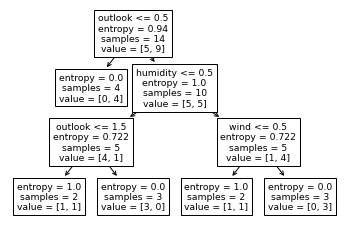

In [10]:
# plot decision tree

from sklearn.tree import plot_tree
plot_tree(model, feature_names=['outlook', 'temperature', 'humidity', 'wind'])

import matplotlib.pyplot as plt
# plt.savefig("tree0704.pdf")
plt.show()